<a href="https://colab.research.google.com/github/jyun0618/TAVE_MLab/blob/main/Chapter04/jiyun_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 4 모델 훈련

### #1
> 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?

확률적 경사 하강법(SGD) 또는 미니배치 경사 하강법

메모리 크기가 훈련 세트에 적당하다면 배치 경사 하강법도 가능

**정규 방정식, SVD 방법은 계산 복잡도가 특성 개수에 따라 매우 빠르게 증가하기 때문에 사용 불가**

### #2
> 훈련 세트에 있는 특성들이 서로 다른 스케일을 가지고 있습니다. 이런 데이터에 잘 작동하지 않는 알고리즘은 무엇일까요? 그 이유는 무엇일까요? 이 문제를 어떻게 해결 할 수 있을까요?

특성 스케일이 매우 다르면 비용함수가 길쭉한 타원 그릇 형태 → 경사 하강법 알고리즘 수렴이 오래걸림

따라서 모델 훈련 전 데이터 스케일 조절 필요

---

+
정규 방정식, SVD는 스케일 조정 없이도 잘 작동

규제가 있는 모델은 특성 스케일이 다르면 지역 최적점 수렴 가능성

규제는 가중치가 커지지 못하게 제약 → 특성값이 작으면 무시되는 경향


### #3
> 경사 하강법으로 로지스틱 회귀 모델을 훈련시킬 때 지역 최솟값에 갇힐 가능성이 있을까요?

로지스틱 회귀 모델의 비용함수는 볼록 함수이므로 지역 최솟값에 갇힐 가능성이 없음

### #4
> 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들어낼까요?

볼록함수이며 학습률이 너무 크지 않으면 모든 알고리즘이 전역 최적값에 도달할 것

그러나 학습률을 점진적으로 감소시키지 않으면 SGD와 미니배치 GD는 최적점에 수렴하지 못하고 전역 최적점 주변을 맴돈다. 즉, 매우 오랫동안 훈련해도 조금씩 다른 모델을 만들게 된다.

### #5
> 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승하고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?

훈련 오차도 함께 올라간다면 학습률이 너무 높고 알고리즘이 발산하기 때문 → 학습률 낮추기

그러나 훈련 오차가 올라가지 않는다면 과대적합 → 훈련 중단


### #6
> 검증 오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는 것이 좋은 방법인가요?

SGD나 미니배치 GD는 무작위성으로 인해 매 훈련 반복마다 학습의 진전을 보장하지 못 함

즉시 중단하기 보단 정기적으로 모델을 저장, 오랫동안 진전이 없을 때 최상의 모델로 복원하는 것이 좋음

### #7
> (우리가 언급한 것 중에서) 어떤 경사 하강법 알고리즘이 가장 빠르게 최적 솔루션에 근접해질까요? 실제로 수렴하는 것은 어떤 것인가요? 다른 방법들도 수렴하게 만들 수 있나요?

확률적 경사 하강법이 가장 먼저 전역 최적점 근처에 도달

그러나 학습률을 점진적으로 감소시키지 않으면 SGD와 미니배치 GD는 최적점 주변을 맴돌 것이며 훈련 시간이 충분하다면 배치 경사 하강법만 실제로 수렴

### #8
> 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 큽니다. 무슨 일이 생긴 걸까요? 이 문제를 해결하는 세 가지 방법은 무엇인가요?

과대적합

1. 다항 차수 낮추기(자유도 낮추기)
2. 모델 규제(비용 함수에 릿지, 라쏘 추가)
3. 훈련 세트 크기 증가 시키기


### #9
>릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델은 높은 편향이 문제인가요, 아님 높은 분산이 문제인가요? 규제 하이퍼파라미터 α를 증가시켜야 할까요, 아니면 줄여야 할까요?

훈련오차와 검증오차가 비슷하고 높아면 과소적합 가능성이 높음
→ 과소적합
* 높은 편향: 모델이 데이터의 복잡한 패턴을 잘 학습하지 못하고, 지나치게 단순한 추정 → 과소적합
* 높은 분산: 모델이 훈련 데이터에 너무 민감하게 반응해서, 작은 변화에도 결과가 크게 달라지는 상황 → 과대적합

높은 편향을 가지는 모델이므로 규제 하이퍼파라미터 α를 감소시켜야 함

### #10
> 다음과 같이 사용해야 하는 이유는 무엇인가요?

> a. 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
>
> b. 릿지 회귀 대신 라쏘 회귀
>
>c. 라쏘 회귀 대신 엘라스틱넷 회귀

a. 일반적으로 규제가 있는 모델이 없는 모델보다 성능이 좋음

b. 라쏘 회귀는 가중치를 완전히 0으로 만드는 경향 → 특성 선택의 효과를 가지므로 단지 몇 개의 특성만 실제 유용할 것이라고 의심될 때 사용

c. 라쏘 회귀는 몇 개의 특성이 강하게 연관 또는 훈련 샘플보다 특성이 많을 경우 불규칙하게 행동하므로 엘라스틱넷 회귀가 선호됨

### #11
> 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두 개의 로지스틱 회귀 분류기를 만들어야 할까요, 아니면 하나의 소프트맥스 회귀 분류기를 만들어야 할까요?

실외와 실내, 낮과 밤 → 배타적 클래스가 아님. 즉, 네 가지 조합이 모두 가능

두 개의 로지스틱 회귀 분류기

### #12
> 사이킷런을 사용하지 않고 넘파이만 사용하여 조기 종료를 사용한 배치 경사 하강법으로 소프트 맥스 회귀를 구현해보세요. 이를 붓꽃 데이터셋 같은 분류 작업에 사용해보세요.

In [15]:
# 데이터 로드
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [13]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

* 편향항 추가
선형대수 연산으로 편향(intercept)과 가중치를 하나의 벡터로 처리

In [18]:
# 1이 들어있는 열 벡터를 생성
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [19]:
np.random.seed(2042)

* train/validation/test set 분할

In [20]:
# train 0.6, validation 0.2, test 0.2
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size) #데이터를 무작위로 섞기 위해 인덱스를 랜덤하게

# 각각의 size만큼 분할
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

* one-hot encoding

주어진 샘플에 대한 클래스 확률이 원-핫 벡터이다

In [21]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1 # 각 행마다 y값에 해당하는 열의 위치를 1로 바꿔줌
    return Y_one_hot

In [22]:
# 각 세트에 적용
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

* 소프트 맥스 함수
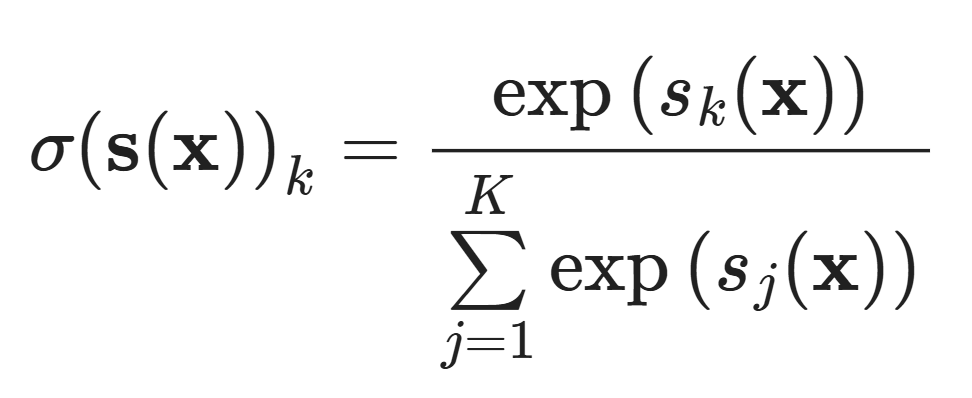

In [23]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

* 입출력 개수 정의

In [24]:
n_inputs = X_train.shape[1] # == 3 (특성 2와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

* 모델 훈련

In [25]:
eta = 0.01 # 학습률
n_iterations = 5001 # 반복 횟수 (총 학습 스텝 수)
m = len(X_train) # 학습 샘플 수
epsilon = 1e-7 # 로그 계산 시 0 방지용 작은 수 (numerical stability)

Theta = np.random.randn(n_inputs, n_outputs) #가중치 행렬

for iteration in range(n_iterations):
    logits = X_train.dot(Theta) #logits은 각 샘플에 대해 클래스별 "점수"
    Y_proba = softmax(logits) # 소프트맥스 함수로 각 샘플에 대해 클래스별 확률 벡터
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1)) # 크로스 엔트로피 손실 함수
    error = Y_proba - Y_train_one_hot # 예측과 실제 값의 차이 → 경사 계산에 사용
    if iteration % 500 == 0:
        print(iteration, loss) # 500번마다 현재 손실(loss)을 출력해서 학습 상황 확인
    gradients = 1/m * X_train.T.dot(error) # gradients: 평균 오차를 기반으로 계산한 가중치의 변화량
    Theta = Theta - eta * gradients # Theta 업데이트: 경사 하강법(GD)

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


* 파라미터 확인

In [26]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

* 검증 세트에 대한 예측과 정확도를 확인

In [29]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

array([[0.91590904, 0.07574412, 0.00834684],
       [0.0094535 , 0.35535128, 0.63519523],
       [0.85760359, 0.12619716, 0.01619926],
       [0.86679689, 0.1200384 , 0.01316471],
       [0.18053423, 0.56850607, 0.25095969],
       [0.00232609, 0.36093987, 0.63673404],
       [0.00184675, 0.20376711, 0.79438614],
       [0.83656765, 0.13899025, 0.0244421 ],
       [0.88625401, 0.10077854, 0.01296745],
       [0.87261512, 0.11287796, 0.01450692],
       [0.04115575, 0.56422484, 0.39461941],
       [0.01936555, 0.50197044, 0.47866401],
       [0.01424778, 0.38949262, 0.5962596 ],
       [0.00974409, 0.3921235 , 0.59813242],
       [0.05228127, 0.59296778, 0.35475095],
       [0.27251404, 0.47867605, 0.24880991],
       [0.00419878, 0.22887872, 0.7669225 ],
       [0.09246683, 0.63098776, 0.27654541],
       [0.00205562, 0.25995682, 0.73798756],
       [0.22171753, 0.53953849, 0.23874397],
       [0.87261512, 0.11287796, 0.01450692],
       [0.02820109, 0.49657451, 0.4752244 ],
       [0.

* l2 규제 추가
* 손실에 l2 페널티가 추가
* 그래디언트에도 항이 추가(Theta의 첫 번째 원소는 편향이므로 규제하지 않습니다)
* 학습률 eta도 증가

In [30]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.4946891059460322
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


* 검증 세트에 대한 예측과 정확도를 확인

In [31]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

* 조기 종료

매 반복에서 검증 세트에 대한 손실을 계산해서 오차가 증가하기 시작할 때 중단

In [33]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.inf

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss) # 손실이 작아지지 않으면 → 개선이 멈췄다고 판단
        print(iteration, loss, "early stopping!") # 현재 반복 이전까지가 가장 좋은 모델이었던 것으로 판단
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 early stopping!


In [34]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

* 전체 데이터셋에 대한 모델의 예측 그래프

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


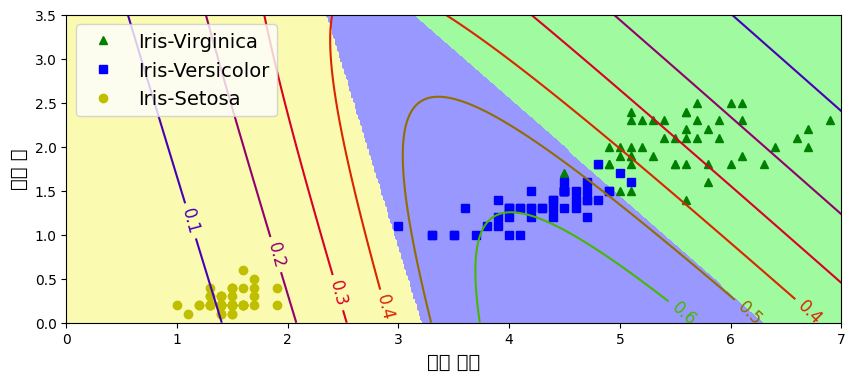

In [37]:
import matplotlib.pyplot as plt

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 폭", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

* 테스트 세트에 대한 모델의 최종 정확도 측정

In [38]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

np.float64(0.9333333333333333)

완벽했던 최종 모델의 성능이 조금 떨어짐. 이런 차이는 데이터셋이 작기 때문일 것